In [21]:
import numpy as np
from sklearn import model_selection, preprocessing, svm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib inline

In [14]:
df = pd.read_csv('./breast-cancer-wisconsin.data.csv')

In [15]:
df.replace('?', -99_999, inplace=True)

In [16]:
df.drop(columns=['id'], inplace=True)

In [17]:
X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [19]:
clf = svm.SVC()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf.score(X_test, y_test), (y_pred==y_test).sum()/len(y_test)

(0.6714285714285714, 0.6714285714285714)

In [20]:
# Yi (XiBar . WBar + b) -1 = 0

In [22]:
data_dict = {
    -1: np.array([
        [1,7],
        [2,8],
        [3,8],
    ]),
    1: np.array([
        [5,1],
        [6,-1],
        [7,3],
    ])
}

In [58]:
class SVM:
    """Support Vector Machine"""
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.subplots(1,1)
    
    def fit(self, data):
        """train"""
        self.data = data
        # { ||w|| : [w,b] } == { |w| : [w,b] }
        opt_dict = {}
        
        transforms = [
            [1,1],
            [-1,1],
            [1,-1],
            [-1,-1],
        ]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w+b) = 1
        # 1.01
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        b_range_multiple = 5
        # we do not need to take as small of steps with b as we do w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attemps to fix this a bit
                        # yi(wi.w+b) >= 1
                        # TODO: add a break here later.
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                                    # print(yi*(np.dot(w_t, xi)+b))
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self, features):
        # sign(x.w+b)
        classification = np.sign(
            np.dot(
                np.array(features),
                self.w
            ) + self.b
        )
        
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=150, marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=90, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x, w, b, v):
            """
            hyperplane = x.w+b
            Parameters:
                v = x.w+b
                psv = 1
                nsv = -1
                dec = 0
            """
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], color='k')
        
        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], color='k')
        
        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], color='y')
        
        plt.show()

Optimized a step
Optimized a step
Optimized a step


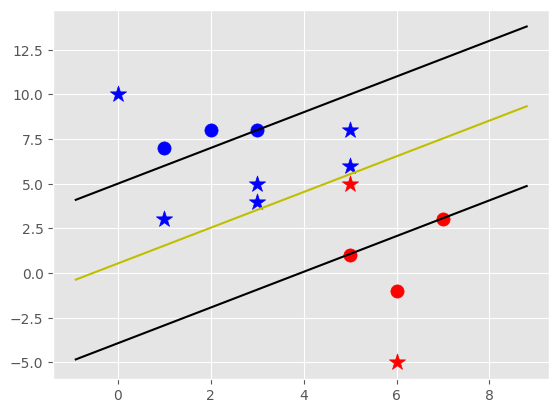

In [59]:
svm = SVM()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8],]

for p in predict_us:
    svm.predict(p)

svm.visualize()

In [60]:
svm.predict([5,2])

1.0

In [62]:
from sklearn.svm import SVC